# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [2]:
# a function that returns the star formation rate for a luminosity

def StarFormationRate(L,Type,TIR=0):
    #computes star formation rate of a galaxy following Kennicutt & Evans 2012 eq12
    # inputs:
    # luminosity of galaxy in erg/s
    # Type of luminosity (in which waveband), as string : FUV, NUV,TIR, Halpha
    # TIR = total infrared luminosity
    # returns the log of the total star formation rate in Msun/year
    
    if Type == 'FUV':
        logCx = 43.35 # calibration from L to SFR from Table 1 Kennicutt and Evans 2012\
        TIRc = 0.46 # correction for dust absorption from Table 2
    elif Type == 'NUV':
        logCx = 43.17
        TIRc = 0.27
    elif Type == 'TIR':
        logCx = 43.41
        TIRc = 0 
    elif Type == 'Halpha':
        logCx = 41.27
        TIRc = 0.0024
    else:
        print("Missing wavelength: FUV, NUV, Halpha, TIR")
    # dust correction to luminosity
    Lnew = L +TIRc*TIR
    
    return np.log10(Lnew) - logCx

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [3]:
LsunErgS = const.L_sun.to(u.erg/u.s).value

In [4]:
# WLM Dwarf Irregular Galaxy
# Lee et al. 2009 WLM galaxy SFR derived from UV is -2.21 --> Galex
# from NED: WLM NUV luminosity (GALEX) 1.71e7 Lsun 
# TIR Luminosity (IRAC) 2.48e6 Lsun

StarFormationRate(LsunErgS*1.71e7,"NUV",2.48e6*LsunErgS)

-2.3373504191027266

In [5]:
# NGC24 Sc galaxy
# -0.70 from UV 
# NUV luminosity 2.96e8 Lsun
# TIR luminosity 3.09e8 Lsun

StarFormationRate(LsunErgS*2.96e8,"NUV",3.09e8*LsunErgS)

-1.0078964050716621

# Part B Star formation main sequence

Write a function that returns the average SFR of a galaxy at a given redshift. 

What is the average SFR of a MW mass galaxy today? at z=1?

Plot the SFR main sequence for a few different redshifts.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

In [6]:
# create a function that returns the log of the Star formation rate on the main sequence

def SFRMS(Mstar, z):
    # average SFR on main sequence of a glaxy as a function of stellar mass and redshift
    # inputs:
    # z = redshift 
    # Mstar = stellar mass of galaxy in Msun 
    # returns log of SFR in msun/year
    
    alpha = 0.7 - 0.13*z
    beta = 0.38 +1.14*z -0.19*z**2
    
    return alpha*(np.log10(Mstar)-10.5) + beta

In [7]:
# MW at z=0

# actual rate is 1 Msun/year
10**SFRMS(6e10,0)

3.7558295562247412

In [8]:
# MW at z = 1
10**SFRMS(6e10,1)

30.799680595160783

In [9]:
# create an array of stellar masses
Mass = np.linspace = (1e9,1e12)

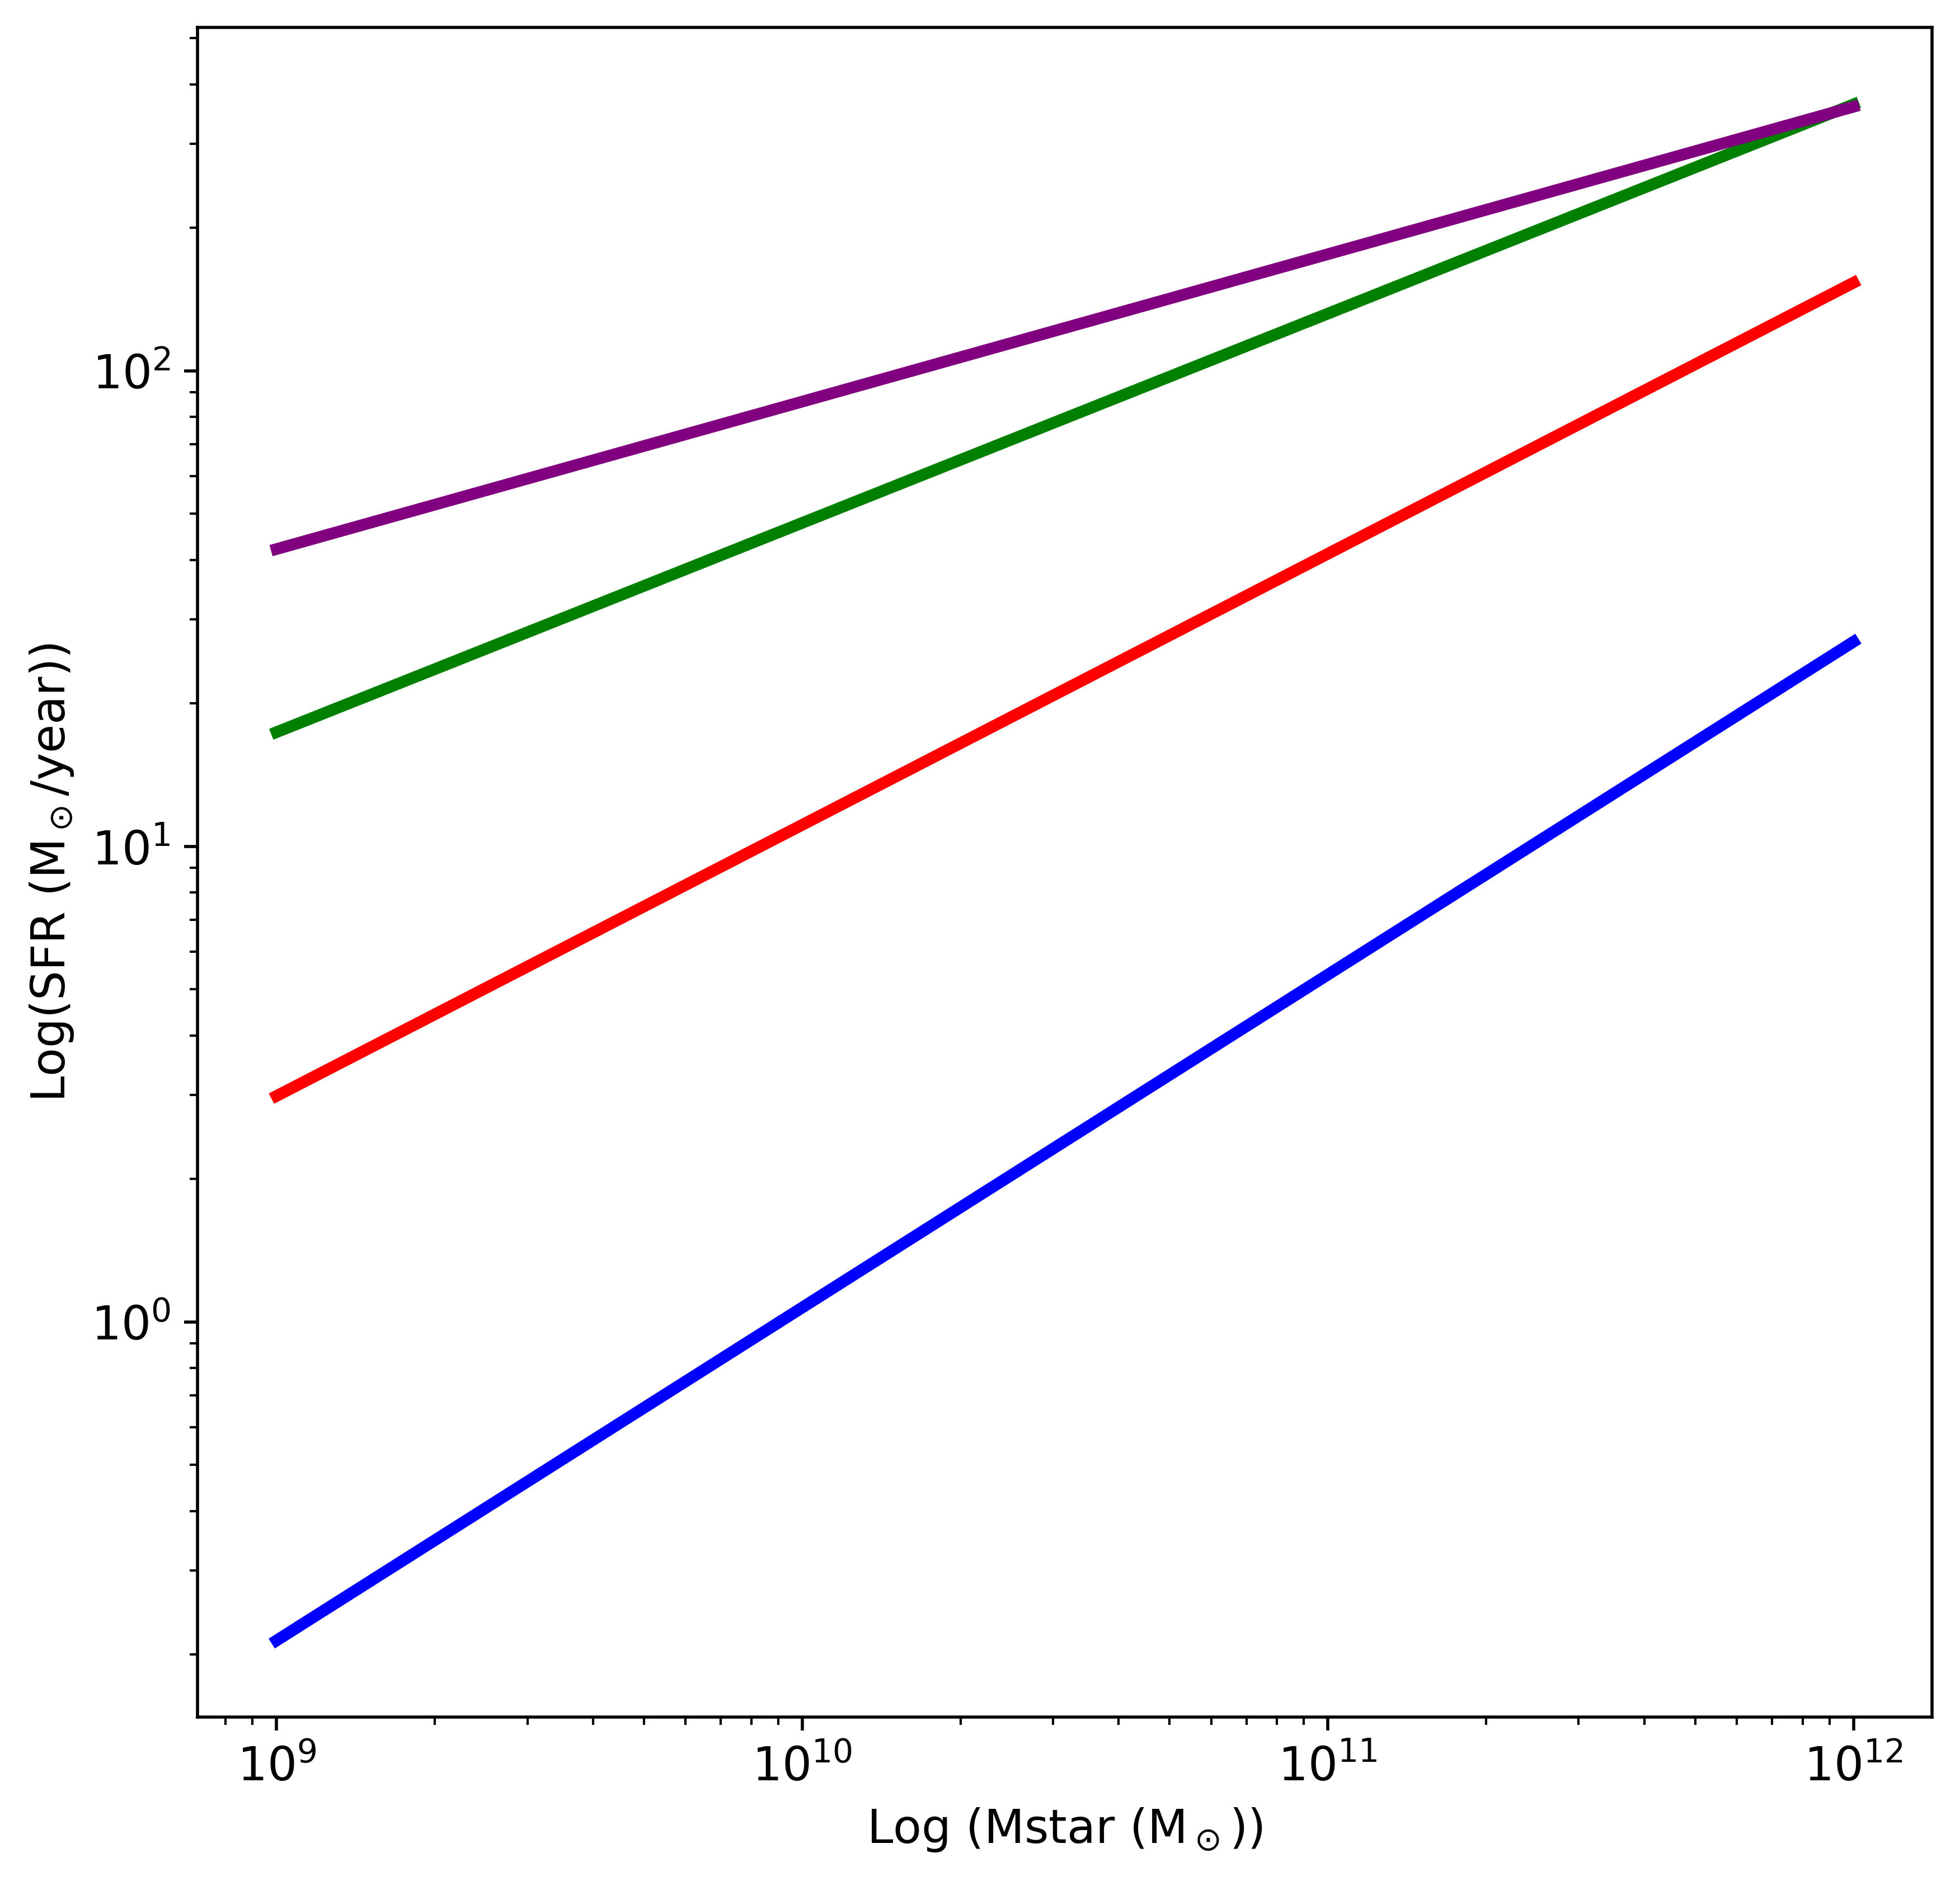

In [17]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass, 10**SFRMS(Mass,0), color = 'b', linewidth=3, label ='z=0')
plt.loglog(Mass, 10**SFRMS(Mass,1), color = 'r', linewidth=3, label ='z=1')
plt.loglog(Mass, 10**SFRMS(Mass,2), color = 'g', linewidth=3, label ='z=2')
plt.loglog(Mass, 10**SFRMS(Mass,3), color = 'purple', linewidth=3, label ='z=3')


# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
#ax.legend(loc='upper left')


# Part C  Starbursts

What are the star formation rates for :

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [26]:
# normal galaxies Lir =10e10 Lsun

TIR_Normal = 1e10*LsunErgS
10**StarFormationRate(TIR_Normal,"TIR")

1.4892648150381245

In [25]:
# LIRGs  

TIR_LIRG = 1e11*LsunErgS
10**StarFormationRate(TIR_LIRG,"TIR")

14.892648150381245

In [24]:
# ULIRGs
TIR_ULIRG = 1e12*LsunErgS
10**StarFormationRate(TIR_ULIRG,"TIR")

148.92648150381245

In [27]:
# HLIRGs
TIR_HLIRG = 1e13*LsunErgS
10**StarFormationRate(TIR_HLIRG,"TIR")

1489.2648150381244